###**1. Seleccione como métodos base un árbol de decisión y una máquina de vectores soporte.**###

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
#Modelos a utilizar en esta práctica
tree=DecisionTreeClassifier()
svm=SVC(kernel='linear', C=1)

In [ ]:
#Lectura de Dataset haciendo uso de URL de github y el nombre de las columnas
def readDataset(file,columns):
  dataset=pd.read_csv(file, header=None, names=columns)
  return dataset

In [ ]:
#Iris Data set
columnas=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']
iris_features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/iris.data', columnas)
iris_X= iris[iris_features]
iris_y= iris['class']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Car Evaluation Data set
columnas=['buying','maint','doors', 'persons', 'lug_boot','safety','class']
car_features=['buying','maint','doors', 'persons', 'lug_boot','safety']
car= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/car.data',columnas)
car['buying']=car['buying'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['maint']=car['maint'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['lug_boot']=car['lug_boot'].map({'small':1, 'med':2, 'big':3})
car['safety']=car['safety'].map({'low':1, 'med':2, 'high':3})
car['doors']=car['doors'].map({'1':1, '2':2,'3':3,'4':4,'5more':7}) #Esto hará que 7 signifique más de 5 puertas o personas
car['persons']=car['persons'].map({'1':1, '2':2,'3':3,'4':4,'more':7})
car_X=car[car_features]
car_y=car['class']
car

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,7,7,2,2,good
1724,1,1,7,7,2,3,vgood
1725,1,1,7,7,3,1,unacc
1726,1,1,7,7,3,2,good


In [ ]:
#Wine Data Set
columnas= ['class','alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine_features=['alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/wine.data',columnas)
wine_X=wine[wine_features]
wine_y=wine['class']
wine.head()

,class,alcohol,malic acid,ash,alcalinityOfAsh,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Diabetes Data Set
columnas=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age','Class']
diabetes_features=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age']
diabetes=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/diabetes.data',columnas)
diabetes_X=diabetes[diabetes_features]
diabetes_y=diabetes['Class']
diabetes.head()


,Times Pregnant,Glucose tolerance,Blood pressure,Triceps skin fold,Insulin,Body mass,Diabetes pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
#Glass Data set
columnas=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type']
glass_features=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe']
glass=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/glass.data',columnas)
glass_X=glass[glass_features]
glass_y=glass['Type']
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [ ]:
#Breast Cancer Wisconsin (Diagnostic) Data set
columnas=['id', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
cancer_features=['Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
cancer=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/breast-cancer-wisconsin.data', columnas)
cancer_X=cancer[cancer_features]
cancer_y= cancer['Class']
cancer.head()

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
#Titanic Data set
titanic = pd.read_csv('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/titanic.csv')
titanic=titanic.drop(['PassengerId','Name', 'Ticket','Cabin','Embarked'],axis=1)
titanic=titanic.dropna()
titanic = titanic.replace({'male':0, 'female':1})
titanic_X=titanic.drop(['Survived'],axis=1)
titanic_y=titanic['Survived']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [ ]:
#Vote Data set
columnas = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa', 'class']
vote_features = ['handicapped-infants','water cost sharing', 'adoption the budget resolution', 'physician fee freezen', 'god aid','religous groups','anti satellite test','aid to nicaraguan contras','mx-misil','inmigration','recortes','gasto de educacion','demandas','crimen','exportacion libre impuestos','adminitracion sur africa']
vote = readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/vote.data',columnas)
vote = vote.replace({'y':0, 'n':1, '?':2})
vote_X = vote[vote_features]
vote_y = vote['class']
vote.head()

,handicapped-infants,water cost sharing,adoption the budget resolution,physician fee freezen,god aid,religous groups,anti satellite test,aid to nicaraguan contras,mx-misil,inmigration,recortes,gasto de educacion,demandas,crimen,exportacion libre impuestos,adminitracion sur africa,class
0,1,0,1,0,0,0,1,1,1,0,2,0,0,0,1,0,republican
1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,2,republican
2,2,0,0,2,0,0,1,1,1,1,0,1,0,0,1,1,democrat
3,1,0,0,1,2,0,1,1,1,1,0,1,0,1,1,0,democrat
4,0,0,0,1,0,0,1,1,1,1,0,2,0,0,0,0,democrat


In [ ]:
#Segment_challeng
columnas = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean','class']
segment_features = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vegde-sd','hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean']
segment = readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/segment_challeng.data',columnas)
segment_X = segment[segment_features]
segment_y = segment['class']
segment.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,144,35,9,0.0,0.0,2.333330,2.033060,2.05556,1.73098,37.5926,32.3333,47.4444,33.0000,-15.77780,29.55560,-13.7778,47.4444,0.319714,-2.13876,cement
1,118,180,9,0.0,0.0,1.944440,1.481990,3.11111,1.08866,48.5556,44.1111,59.0000,42.5556,-13.33330,31.33330,-18.0000,59.0000,0.278822,-1.99604,path
2,6,174,9,0.0,0.0,1.888890,1.007410,2.88889,4.02963,19.0741,15.1111,17.7778,24.3333,-11.88890,-3.88889,15.7778,24.3333,0.381867,2.39502,grass
3,152,220,9,0.0,0.0,0.944445,0.685185,1.44444,2.16296,14.6296,11.5556,13.1111,19.2222,-9.22222,-4.55556,13.7778,19.2222,0.416705,2.30688,grass
4,189,142,9,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.000000,0.00000,window


###**2- Para cada uno de estos dos métodos de clasificación realice los siguientes pasos usando validación cruzada de 10 particiones**###

####**2.1- Aplique el método base a cada uno de los conjuntos y anote los resultados obtenidos**####

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
#Métodos base
tree=DecisionTreeClassifier()
svm=SVC(kernel='linear', C=1)

In [ ]:
tree_score=[]
svm_score=[]

Aplicando el arbol de decision a cadaa uno de los dataset


In [ ]:
iris_tree=cross_val_score(tree,iris_X,iris_y,cv=10,scoring='accuracy').mean()
tree_score.append(iris_tree)
tree_score

[0.96]

In [ ]:
car_tree=cross_val_score(tree,car_X,car_y,cv=10,scoring='accuracy').mean()
tree_score.append(car_tree)
tree_score

[0.96, 0.8842888829143704]

In [ ]:
wine_tree=cross_val_score(tree,wine_X,wine_y,cv=10,scoring='accuracy').mean()
tree_score.append(wine_tree)
tree_score

[0.96, 0.8842888829143704, 0.8539215686274509]

In [ ]:
diabetes_tree=cross_val_score(tree,diabetes_X,diabetes_y,cv=10,scoring='accuracy').mean()
tree_score.append(diabetes_tree)
tree_score

[0.96, 0.8842888829143704, 0.8539215686274509, 0.7135167464114833]

In [ ]:
glass_tree=cross_val_score(tree,glass_X,glass_y,cv=10, scoring='accuracy').mean()
tree_score.append(glass_tree)
tree_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.96,
 0.8842888829143704,
 0.8539215686274509,
 0.7135167464114833,
 0.7008658008658009]

In [ ]:
cancer_tree=cross_val_score(tree, cancer_X, cancer_y, cv=10, scoring='accuracy').mean()
tree_score.append(cancer_tree)
tree_score

[0.96,
 0.8842888829143704,
 0.8539215686274509,
 0.7135167464114833,
 0.7008658008658009,
 0.9546888320545609]

In [ ]:
titanic_tree=cross_val_score(tree, titanic_X, titanic_y, cv=10, scoring='accuracy').mean()
tree_score.append(titanic_tree)
tree_score

[0.96,
 0.8842888829143704,
 0.8539215686274509,
 0.7135167464114833,
 0.7008658008658009,
 0.9546888320545609,
 0.7732981220657277]

In [ ]:
vote_tree=cross_val_score(tree, vote_X, vote_y, cv=10, scoring='accuracy').mean()
tree_score.append(vote_tree)
tree_score

[0.96,
 0.8842888829143704,
 0.8539215686274509,
 0.7135167464114833,
 0.7008658008658009,
 0.9546888320545609,
 0.7732981220657277,
 0.949154334038055]

In [ ]:
segment_tree=cross_val_score(tree, segment_X, segment_y, cv=10, scoring='accuracy').mean()
tree_score.append(segment_tree)
tree_score

[0.96,
 0.8842888829143704,
 0.8539215686274509,
 0.7135167464114833,
 0.7008658008658009,
 0.9546888320545609,
 0.7732981220657277,
 0.949154334038055,
 0.9407407407407407]

Aplicando SVM, maquina de vector soporte 

In [ ]:
svm_score=[]

In [ ]:
iris_svm= cross_val_score(svm, iris_X, iris_y, cv=10, scoring='accuracy').mean()
svm_score.append(iris_svm)
svm_score

[0.9733333333333334]

In [ ]:
car_svm= cross_val_score(svm, car_X, car_y, cv=10, scoring='accuracy').mean()
svm_score.append(car_svm)
svm_score

[0.9733333333333334, 0.7747210646592284]

In [ ]:
wine_svm= cross_val_score(svm, wine_X, wine_y, cv=10, scoring='accuracy').mean()
svm_score.append(wine_svm)
svm_score

[0.9733333333333334, 0.7747210646592284, 0.9555555555555555]

In [ ]:
diabetes_svm= cross_val_score(svm, diabetes_X, diabetes_y, cv=10, scoring='accuracy').mean()
svm_score.append(diabetes_svm)
svm_score

[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314]

In [ ]:
glass_svm= cross_val_score(svm, glass_X, glass_y, cv=10, scoring='accuracy').mean()
svm_score.append(glass_svm)
svm_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541]

In [ ]:
cancer_svm= cross_val_score(svm, cancer_X, cancer_y, cv=10, scoring='accuracy').mean()
svm_score.append(cancer_svm)
svm_score

[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632]

In [ ]:
titanic_svm= cross_val_score(svm, titanic_X, titanic_y, cv=10, scoring='accuracy').mean()
svm_score.append(titanic_svm)
svm_score

[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632,
 0.7799882629107981]

In [ ]:
vote_svm= cross_val_score(svm, vote_X, vote_y, cv=10, scoring='accuracy').mean()
svm_score.append(vote_svm)
svm_score

[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632,
 0.7799882629107981,
 0.9514799154334037]

In [ ]:
segment_svm= cross_val_score(svm, segment_X, segment_y, cv=10, scoring='accuracy').mean()
svm_score.append(segment_svm)
svm_score

[0.9733333333333334,
 0.7747210646592284,
 0.9555555555555555,
 0.7669685577580314,
 0.6541125541125541,
 0.9664109121909632,
 0.7799882629107981,
 0.9514799154334037,
 0.9530864197530866]

In [ ]:
import matplotlib.pyplot as plt

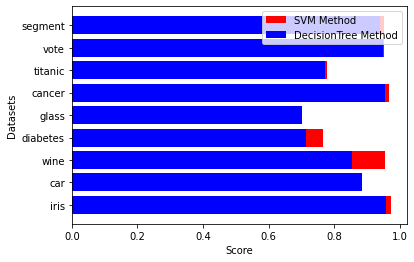

In [ ]:
datasets=['iris', 'car', 'wine', 'diabetes', 'glass', 'cancer', 'titanic', 'vote', 'segment']
plt.barh(datasets, svm_score, label='SVM Method', color='r')
plt.barh(datasets, tree_score, label='DecisionTree Method', color='b')
plt.xlabel("Score")
plt.ylabel("Datasets")
plt.legend()
plt.show()

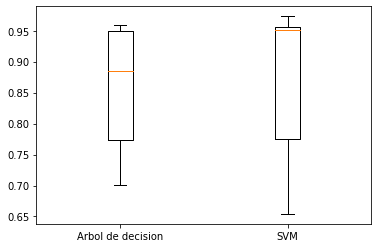

In [ ]:
plt.boxplot([tree_score, svm_score], labels=["Arbol de decision", "SVM"]);

####**2.2. Aplique el método de combinación de clasificadores Bagging a cada uno de los conjuntos y anote los resultados obtenidos.**####

El Bagging (Bootstrap Aggregating) es un método de ensamblaje de varios clasificadores que se basa en la selección aleatoria de muestras con reemplazo de los datos de entrenamiento para construir varios modelos. Cada modelo se entrena con un conjunto diferente de datos y luego se combinan para obtener una mejor precisión. El resultado final se puede obtener mediante la votación de los clasificadores individuales.

Para aplicar Bagging a un conjunto de datos específico, se debe seguir los siguientes pasos:

Seleccionar un modelo base.
Generar varios subconjuntos de datos de entrenamiento a partir del conjunto original mediante la técnica de muestreo con reemplazo.
Entrenar un modelo base para cada subconjunto de datos.
Combinar los modelos entrenados mediante la votación

Una vez que se ha aplicado el método Bagging, se pueden comparar los resultados obtenidos con el modelo base para evaluar si el ensamblaje ha mejorado la precisión del modelo.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
def baggingMethod(method, data_X, data_y):
  #Creacion de objeto Bagging Classifier para el arbol de decision
  bagging = BaggingClassifier(base_estimator=method, n_estimators=10, random_state=0)
  #Validación cruzada
  cross_val= cross_val_score(bagging, data_X, data_y, cv=10, scoring='accuracy').mean()
  return cross_val

In [ ]:
bagging_tree_score=[]

In [ ]:
iris_bagging_tree= baggingMethod(tree, iris_X, iris_y)
bagging_tree_score.append(iris_bagging_tree)
bagging_tree_score

[0.9466666666666667]

In [ ]:
car_bagging_tree= baggingMethod(tree, car_X, car_y)
bagging_tree_score.append(car_bagging_tree)
bagging_tree_score

[0.9466666666666667, 0.8819565801855088]

In [ ]:
wine_bagging_tree= baggingMethod(tree, wine_X, wine_y)
bagging_tree_score.append(wine_bagging_tree)
bagging_tree_score

[0.9466666666666667, 0.8819565801855088, 0.9388888888888889]

In [ ]:
diabetes_bagging_tree= baggingMethod(tree, diabetes_X, diabetes_y)
bagging_tree_score.append(diabetes_bagging_tree)
bagging_tree_score

[0.9466666666666667,
 0.8819565801855088,
 0.9388888888888889,
 0.7304853041695146]

In [ ]:
glass_bagging_tree= baggingMethod(tree, glass_X, glass_y)
bagging_tree_score.append(glass_bagging_tree)
bagging_tree_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.9466666666666667,
 0.8819565801855088,
 0.9388888888888889,
 0.7304853041695146,
 0.7287878787878788]

In [ ]:
cancer_bagging_tree= baggingMethod(tree, cancer_X, cancer_y)
bagging_tree_score.append(cancer_bagging_tree)
bagging_tree_score

[0.9466666666666667,
 0.8819565801855088,
 0.9388888888888889,
 0.7304853041695146,
 0.7287878787878788,
 0.9591219096334186]

In [ ]:
titanic_bagging_tree= baggingMethod(tree, titanic_X,titanic_y)
bagging_tree_score.append(titanic_bagging_tree)
bagging_tree_score

[0.9466666666666667,
 0.8819565801855088,
 0.9388888888888889,
 0.7304853041695146,
 0.7287878787878788,
 0.9591219096334186,
 0.7996870109546166]

In [ ]:
vote_bagging_tree= baggingMethod(tree, vote_X,vote_y)
bagging_tree_score.append(vote_bagging_tree)
bagging_tree_score

[0.9466666666666667,
 0.8819565801855088,
 0.9388888888888889,
 0.7304853041695146,
 0.7287878787878788,
 0.9591219096334186,
 0.7996870109546166,
 0.9539112050739957]

In [ ]:
segment_bagging_tree= baggingMethod(tree, segment_X, segment_y)
bagging_tree_score.append(segment_bagging_tree)
bagging_tree_score

[0.9466666666666667,
 0.8819565801855088,
 0.9388888888888889,
 0.7304853041695146,
 0.7287878787878788,
 0.9591219096334186,
 0.7996870109546166,
 0.9539112050739957,
 0.9506172839506174]

Ahora aplicamos bagging al clasificador svm

In [ ]:
bagging_svm_score=[]

In [ ]:
iris_bagging_svm = baggingMethod(svm, iris_X, iris_y)
bagging_svm_score.append(iris_bagging_svm)
bagging_svm_score

[0.9866666666666667]

In [ ]:
car_bagging_svm = baggingMethod(svm, car_X, car_y)
bagging_svm_score.append(car_bagging_svm)
bagging_svm_score

[0.9866666666666667, 0.779950262132007]

In [ ]:
wine_bagging_svm = baggingMethod(svm, wine_X, wine_y)
bagging_svm_score.append(wine_bagging_svm)
bagging_svm_score

[0.9866666666666667, 0.779950262132007, 0.9607843137254901]

In [ ]:
diabetes_bagging_svm = baggingMethod(svm, diabetes_X, diabetes_y)
bagging_svm_score.append(diabetes_bagging_svm)
bagging_svm_score

[0.9866666666666667, 0.779950262132007, 0.9607843137254901, 0.773462064251538]

In [ ]:
glass_bagging_svm = baggingMethod(svm, glass_X, glass_y)
bagging_svm_score.append(glass_bagging_svm)
bagging_svm_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.9866666666666667,
 0.779950262132007,
 0.9607843137254901,
 0.773462064251538,
 0.6073593073593073]

In [ ]:
cancer_bagging_svm = baggingMethod(svm, cancer_X, cancer_y)
bagging_svm_score.append(cancer_bagging_svm)
bagging_svm_score

[0.9866666666666667,
 0.779950262132007,
 0.9607843137254901,
 0.773462064251538,
 0.6073593073593073,
 0.9693307757885762]

In [ ]:
titanic_bagging_svm = baggingMethod(svm, titanic_X, titanic_y)
bagging_svm_score.append(titanic_bagging_svm)
bagging_svm_score

[0.9866666666666667,
 0.779950262132007,
 0.9607843137254901,
 0.773462064251538,
 0.6073593073593073,
 0.9693307757885762,
 0.7799882629107981]

In [ ]:
vote_bagging_svm = baggingMethod(svm, vote_X, vote_y)
bagging_svm_score.append(vote_bagging_svm)
bagging_svm_score

[0.9866666666666667,
 0.779950262132007,
 0.9607843137254901,
 0.773462064251538,
 0.6073593073593073,
 0.9693307757885762,
 0.7799882629107981,
 0.9515856236786469]

In [ ]:
segment_bagging_svm = baggingMethod(svm, segment_X, segment_y)
bagging_svm_score.append(segment_bagging_svm)
bagging_svm_score

[0.9866666666666667,
 0.779950262132007,
 0.9607843137254901,
 0.773462064251538,
 0.6073593073593073,
 0.9693307757885762,
 0.7799882629107981,
 0.9515856236786469,
 0.9592592592592594]

Primero comparamos, los bagging entree svm y arbol

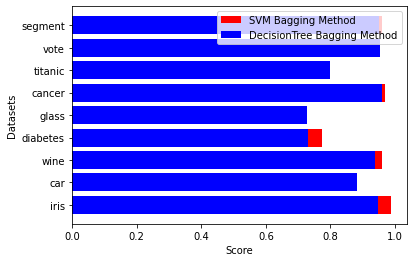

In [ ]:
datasets=['iris', 'car', 'wine', 'diabetes', 'glass', 'cancer', 'titanic', 'vote', 'segment']
plt.barh(datasets, bagging_svm_score, label='SVM Bagging Method', color='r')
plt.barh(datasets, bagging_tree_score, label='DecisionTree Bagging Method', color='b')
plt.xlabel("Score")
plt.ylabel("Datasets")
plt.legend()
plt.show()

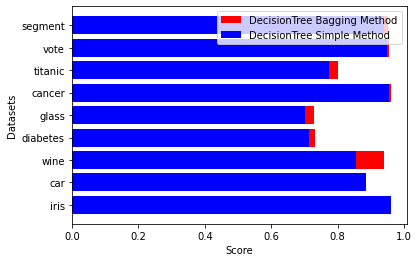

In [ ]:
datasets=['iris', 'car', 'wine', 'diabetes', 'glass', 'cancer', 'titanic', 'vote', 'segment']
plt.barh(datasets, bagging_tree_score, label='DecisionTree Bagging Method', color='r')
plt.barh(datasets, tree_score, label='DecisionTree Simple Method', color='b')
plt.xlabel("Score")
plt.ylabel("Datasets")
plt.legend()
plt.show()

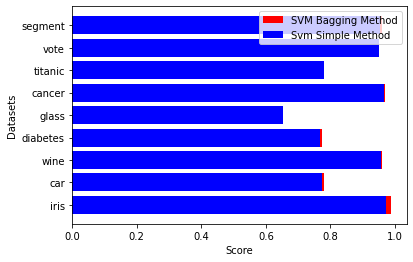

In [ ]:
datasets=['iris', 'car', 'wine', 'diabetes', 'glass', 'cancer', 'titanic', 'vote', 'segment']
plt.barh(datasets, bagging_svm_score, label='SVM Bagging Method', color='r')
plt.barh(datasets, svm_score, label='Svm Simple Method', color='b')
plt.xlabel("Score")
plt.ylabel("Datasets")
plt.legend()
plt.show()

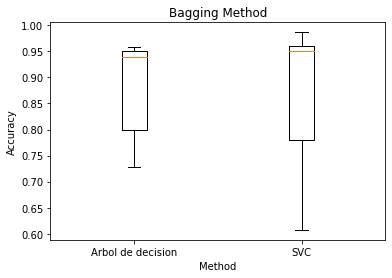

In [ ]:
plt.boxplot([bagging_tree_score, bagging_svm_score], labels=["Arbol de decision", "SVC"])
plt.title('Bagging Method')
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.show()

####**2.3. Seleccione dos algoritmos de Boosting y aplique estos algoritmos a cada uno de los conjuntos y anote los resultados obtenidos.**####

In [ ]:
def accuracyGraphic(datasets, first_accuracy, second_accuracy, first_model, second_model):
  plt.plot(datasets, first_accuracy, label=first_model+'_accuracy')
  plt.plot(datasets, second_accuracy, label=second_model+'_accuracy')
  plt.xlabel('Datasets')
  plt.ylabel('Accuracy')
  plt.title(first_model+' vs '+second_model)
  plt.legend()
  plt.show()

AdaBoost (Adaptive Boosting) es un algoritmo de aprendizaje automático en el que se combinan varios clasificadores débiles para producir uno fuerte. El algoritmo comienza asignando un peso igual a todas las muestras y luego ajusta los pesos de las muestras mal clasificadas en cada iteración.

Gradient Boosting es un algoritmo de aprendizaje automático en el que se combinan varios árboles de decisión débiles para producir uno fuerte. El algoritmo comienza con un árbol de decisión simple y luego ajusta los pesos de las muestras mal clasificadas en cada iteración.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
def AdaBoostMethod(data_X, data_y):
  ada=AdaBoostClassifier()
  #Validación cruzada
  cross_val= cross_val_score(ada, data_X, data_y, cv=10, scoring='accuracy').mean()
  return cross_val

In [ ]:
ada_score=[]

In [ ]:
iris_ada=AdaBoostMethod(iris_X, iris_y)
ada_score.append(iris_ada)
ada_score

[0.9533333333333334]

In [ ]:
car_ada=AdaBoostMethod(car_X, car_y)
ada_score.append(car_ada)
ada_score


[0.9533333333333334, 0.8622865976609759]

In [ ]:
wine_ada=AdaBoostMethod(wine_X, wine_y)
ada_score.append(wine_ada)
ada_score

[0.9533333333333334, 0.8622865976609759, 0.8833333333333332]

In [ ]:
diabetes_ada=AdaBoostMethod(diabetes_X, diabetes_y)
ada_score.append(diabetes_ada)
ada_score

[0.9533333333333334,
 0.8622865976609759,
 0.8833333333333332,
 0.7552460697197538]

In [ ]:
glass_ada=AdaBoostMethod(glass_X, glass_y)
ada_score.append(glass_ada)
ada_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.9533333333333334,
 0.8622865976609759,
 0.8833333333333332,
 0.7552460697197538,
 0.4675324675324675]

In [ ]:
cancer_ada=AdaBoostMethod(cancer_X, cancer_y)
ada_score.append(cancer_ada)
ada_score

[0.9533333333333334,
 0.8622865976609759,
 0.8833333333333332,
 0.7552460697197538,
 0.4675324675324675,
 0.9547527706734869]

In [ ]:
titanic_ada=AdaBoostMethod(titanic_X, titanic_y)
ada_score.append(titanic_ada)
ada_score

[0.9533333333333334,
 0.8622865976609759,
 0.8833333333333332,
 0.7552460697197538,
 0.4675324675324675,
 0.9547527706734869,
 0.8039514866979657]

In [ ]:
vote_ada=AdaBoostMethod(vote_X, vote_y)
ada_score.append(vote_ada)
ada_score

[0.9533333333333334,
 0.8622865976609759,
 0.8833333333333332,
 0.7552460697197538,
 0.4675324675324675,
 0.9547527706734869,
 0.8039514866979657,
 0.9631606765327696]

In [ ]:
segment_ada=AdaBoostMethod(segment_X, segment_y)
ada_score.append(segment_ada)
ada_score

[0.9533333333333334,
 0.8622865976609759,
 0.8833333333333332,
 0.7552460697197538,
 0.4675324675324675,
 0.9547527706734869,
 0.8039514866979657,
 0.9631606765327696,
 0.45061728395061734]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def GradientBoostingMethod(data_X, data_y):
  gb=GradientBoostingClassifier()
  #Validación cruzada
  cross_val= cross_val_score(gb, data_X, data_y, cv=10, scoring='accuracy').mean()
  return cross_val

In [ ]:
gb_score=[]

In [ ]:
iris_gb= GradientBoostingMethod(iris_X, iris_y)
gb_score.append(iris_gb)
gb_score

[0.96]

In [ ]:
car_gb= GradientBoostingMethod(car_X, car_y)
gb_score.append(car_gb)
gb_score

[0.96, 0.8975601559349375]

In [ ]:
wine_gb= GradientBoostingMethod(wine_X, wine_y)
gb_score.append(wine_gb)
gb_score

[0.96, 0.8975601559349375, 0.9104575163398693]

In [ ]:
diabetes_gb= GradientBoostingMethod(diabetes_X, diabetes_y)
gb_score.append(diabetes_gb)
gb_score

[0.96, 0.8975601559349375, 0.9104575163398693, 0.7630041011619959]

In [ ]:
glass_gb= GradientBoostingMethod(glass_X, glass_y)
gb_score.append(glass_gb)
gb_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


[0.96,
 0.8975601559349375,
 0.9104575163398693,
 0.7630041011619959,
 0.7902597402597402]

In [ ]:
cancer_gb= GradientBoostingMethod(cancer_X, cancer_y)
gb_score.append(cancer_gb)
gb_score

[0.96,
 0.8975601559349375,
 0.9104575163398693,
 0.7630041011619959,
 0.7902597402597402,
 0.9620630861040069]

In [ ]:
titanic_gb= GradientBoostingMethod(titanic_X, titanic_y)
gb_score.append(titanic_gb)
gb_score

[0.96,
 0.8975601559349375,
 0.9104575163398693,
 0.7630041011619959,
 0.7902597402597402,
 0.9620630861040069,
 0.8194248826291078]

In [ ]:
vote_gb= GradientBoostingMethod(vote_X, vote_y)
gb_score.append(vote_gb)
gb_score

[0.96,
 0.8975601559349375,
 0.9104575163398693,
 0.7630041011619959,
 0.7902597402597402,
 0.9620630861040069,
 0.8194248826291078,
 0.956183932346723]

In [ ]:
segment_gb= GradientBoostingMethod(segment_X, segment_y)
gb_score.append(segment_gb)
gb_score

[0.96,
 0.8975601559349375,
 0.9104575163398693,
 0.7630041011619959,
 0.7902597402597402,
 0.9620630861040069,
 0.8194248826291078,
 0.956183932346723,
 0.9567901234567902]

In [ ]:
dataset=['iris','car','wine','diabetes','glass','cancer','titanic','vote','segment']

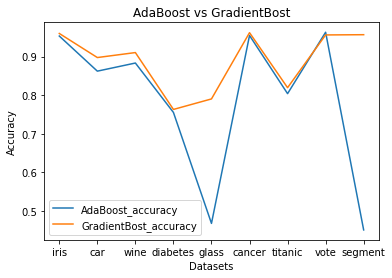

In [ ]:
accuracyGraphic(dataset, ada_score, gb_score, "AdaBoost", "GradientBost")

####**2.4. Compare si hay diferencias significativas entre ellos usando el test de Iman-Davenport. Si es así, aplique el procedimiento de Wilcoxon para comparar cada método de agrupación con el clasificador base.**####

In [ ]:
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

In [ ]:
#Comparación de modelos bagging 
print('MODELOS BAGGING')
if(mannwhitneyu(bagging_tree_score,bagging_svm_score).pvalue < 0.50):
  print('Se rechaza la hipotesis nula del test de Iman-Davenport')
  print('Test de wilcoxon arbol vs bagging: ', wilcoxon(tree_score, bagging_tree_score))
  print('Test de wilcoxon svc vs bagging: ', wilcoxon(tree_score, bagging_svm_score))

MODELOS BAGGING
Se rechaza la hipotesis nula del test de Iman-Davenport
Test de wilcoxon arbol vs bagging:  WilcoxonResult(statistic=6.0, pvalue=0.0546875)
Test de wilcoxon svc vs bagging:  WilcoxonResult(statistic=15.0, pvalue=0.42578125)


In [ ]:
#Comparacion de modelos boosting
print('MODELOS BOOSTING')
if(mannwhitneyu(ada_score, gb_score).pvalue < 0.50):
  print('Se rechaza la hipotesis nula del test de Iman-Davenport')
  print('Test de wilcoxon adabost vs arbol: ', wilcoxon(ada_score, tree_score))
  print('Test de wilcoxon adabost vs svc: ', wilcoxon(ada_score, svm_score))
  print('Test de Wilcoxon gradientbost vs arbol: ', wilcoxon(gb_score, tree_score))
  print('Test de Wilcoxon gradientbost vs svc: ', wilcoxon(gb_score, svm_score))

MODELOS BOOSTING
Se rechaza la hipotesis nula del test de Iman-Davenport
Test de wilcoxon adabost vs arbol:  WilcoxonResult(statistic=22.0, pvalue=1.0)
Test de wilcoxon adabost vs svc:  WilcoxonResult(statistic=14.0, pvalue=0.359375)
Test de Wilcoxon gradientbost vs arbol:  WilcoxonResult(statistic=0.0, pvalue=0.011718685599768628)
Test de Wilcoxon gradientbost vs svc:  WilcoxonResult(statistic=17.0, pvalue=0.5703125)


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


####**3. Enuncie las conclusiones del estudio indicando la influencia del clasificador base en el rendimiento de las agrupaciones de clasificadores.**####

Utilizar un clasificador de árbol de decisión o un clasificador basado en el algoritmo de vectores de soporte (SVM) puede tener diferentes ventajas y desventajas en función del conjunto de datos y el problema específico. Sin embargo, cuando se utilizan técnicas de Boosting o Bagging, se pueden mejorar los resultados de estos clasificadores.

Boosting consiste en combinar varios clasificadores débiles para producir uno fuerte. Al combinar varios modelos, se pueden reducir los errores cometidos por cada modelo individual y mejorar la precisión global del modelo. Además, Boosting puede ser especialmente efectivo para manejar conjuntos de datos con un gran número de características o con un gran desequilibrio en la distribución de las clases.

Por otro lado, Bagging consiste en entrenar varios modelos independientes con diferentes subconjuntos de los datos de entrenamiento y luego combinarlos para producir un modelo final. Al entrenar varios modelos independientes, se pueden reducir los errores cometidos por un modelo debido a un conjunto de datos específico y mejorar la robustez del modelo.

En resumen, utilizar técnicas de Boosting o Bagging con un clasificador de árbol de decisión o SVM puede mejorar el rendimiento de estos clasificadores. Sin embargo, es importante evaluar el rendimiento del modelo en función del conjunto de datos y del problema específico antes de decidir qué técnica utilizar.